In [1]:
library(caret)
library(ggplot2)
data(iris)
names(iris)

Loading required package: lattice
Loading required package: ggplot2


[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

In [2]:
table(iris$Species)


    setosa versicolor  virginica 
        50         50         50 

In [3]:
inTrain <- createDataPartition(y=iris$Species ,p=0.7 ,list=FALSE)
training <-iris[inTrain,]
testing <-iris[-inTrain,]
dim(training)
dim(testing)

[1] 105   5

[1] 45  5

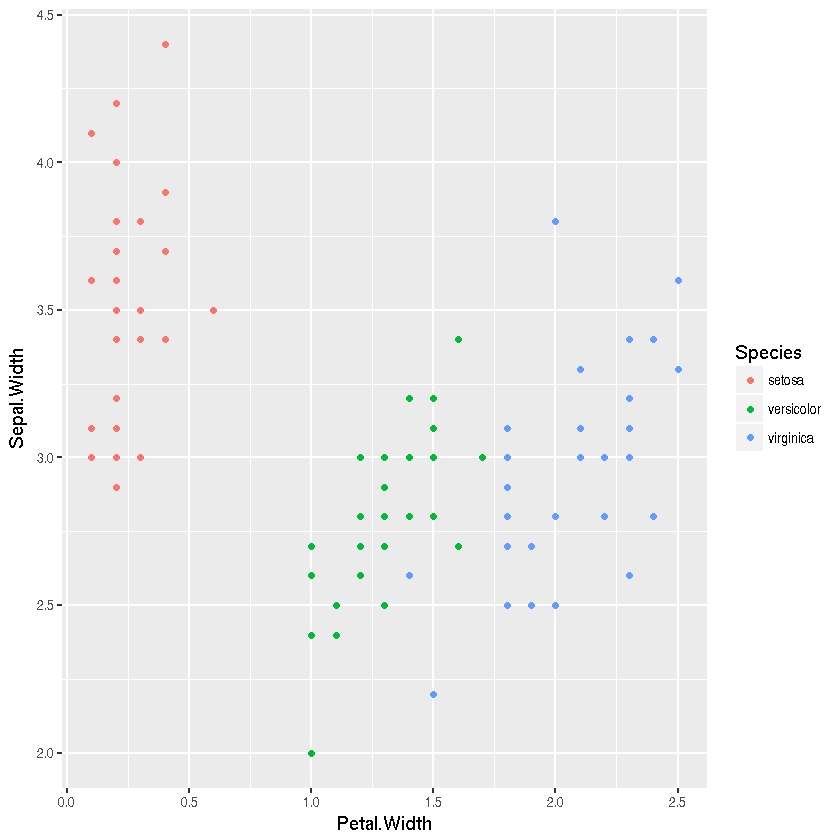

In [4]:
qplot(Petal.Width,Sepal.Width,color=Species,data=training)

In [5]:
library(caret)
modFit <- train(Species ~ .,method="rpart",data=training)
print(modFit$finalModel)

Loading required package: rpart


n= 105 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 105 70 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.6 35  0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.6 70 35 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.75 37  2 versicolor (0.00000000 0.94594595 0.05405405) *
    7) Petal.Width>=1.75 33  0 virginica (0.00000000 0.00000000 1.00000000) *


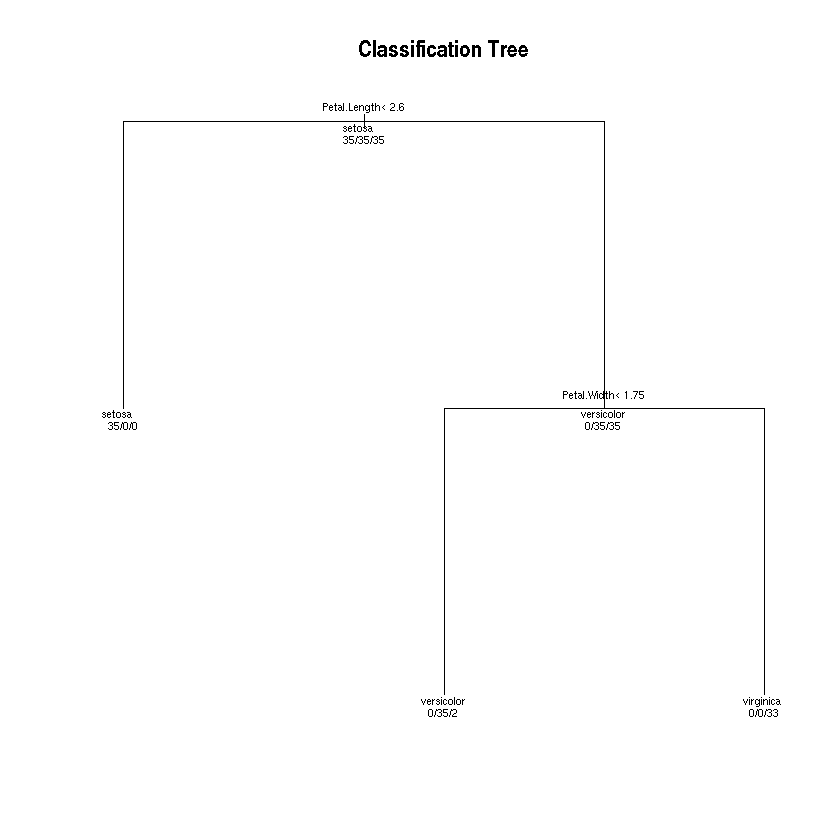

In [6]:
plot(modFit$finalModel, uniform = TRUE,main = "Classification Tree")
text(modFit$finalModel, use.n = TRUE, all =TRUE, cex = 0.5)

Rattle: A free graphical interface for data mining with R.
Version 4.1.0 Copyright (c) 2006-2015 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.
Warning message in polygon(x[, i], y[, i], col = col[i], border = border.col[i], :
“semi-transparency is not supported on this device: reported only once per page”

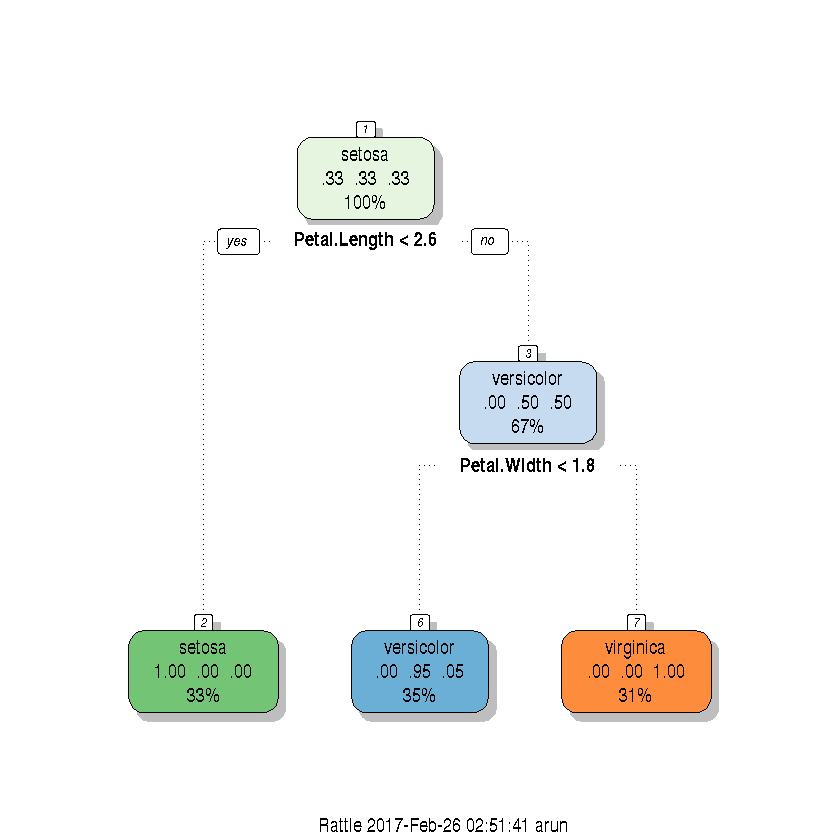

In [7]:
library(rattle)
fancyRpartPlot(modFit$finalModel)